## Example using quantatative pipeline for HIV's region RRE

In [13]:
%matplotlib inline

import re
import os
import sys
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import Align
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
from igraph import Graph as igraph_graph, plot, rescale

# adding project folder to lib search path
project = "/".join((os.path.split(os.getcwd())[0], os.path.split(os.getcwd())[1], 'scripts'))
if project not in sys.path:
    sys.path.append(project)
    
import loader
import work_with_files
import classificator_k_mer
import tree_building
import patient
import graph
import data_prep_k_mer
import quantitative_analyze
import calculating_metrics

### Downloading data

In [6]:
# making loader class

downloader = loader.Loader()

In [8]:
# downloading all needed data

downloader.load_all()

### Example work with patient

In [2]:
# let's see data for the patient

pat = patient.Patient('p1')

pat_data = pat.regions.region

pat_data.head()

,days,frequency,name,nreads,sequence,translated
934,0,100.0,V5ext,1,CTATTGACAAGAGATGGGGGTACTAATAATGATACTAATAATGATA...,"(L, L, T, R, D, G, G, T, N, N, D, T, N, N, D, ..."
911,0,100.0,nef,1,ATGGGTGGCAAGTGGTCAAAGAGTAGCATAGTGGGATGGCCTCAGG...,"(M, G, G, K, W, S, K, S, S, I, V, G, W, P, Q, ..."
910,0,100.0,gag,1,ATGGGTGCGAGAGCGTCAGTATTAAGTGGGGGAAAATTAGATGCAT...,"(M, G, A, R, A, S, V, L, S, G, G, K, L, D, A, ..."
909,0,100.0,vpr,1,ATGGAACAAGCCCCAGAAGACCAGGGGCCACAGAGAGAACCCCATA...,"(M, E, Q, A, P, E, D, Q, G, P, Q, R, E, P, H, ..."
908,0,100.0,env,1,ATGAAAGTGATGGGGACACAAATGAATTGCTCGCACTTATGGAAAT...,"(M, K, V, M, G, T, Q, M, N, C, S, H, L, W, K, ..."


### Making phylo tree

In [3]:
# making and building

tree = tree_building.Tree(pat_data.loc[pat_data.name == 'V3'])

tree.build()

In [4]:
seq_data = tree.mapping

# seq data is dict = {(day, seq):id}

In [5]:
# Converting our tree in graph

vertices = [i for i in range(len(tree.mapping))]
edges = tree.graph

g = graph.Graph()
g.add_vertices(vertices)
g.set_edge_weights(edges)

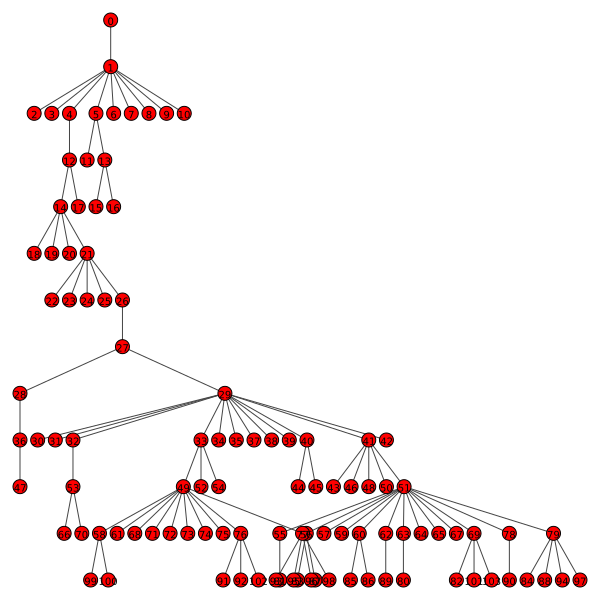

In [6]:
# plotting

layout = g.layout_reingold_tilford(mode='in', root=[tree.mapping[(tree.start_day, tree.root.seq)]])

plot(g, layout=layout, vertex_label=vertices, vertex_label_size=10, vertex_size=14, out_range=(0.4, 3))

In [8]:
# getting all paths
phylo_paths = g.all_paths()
phylo_paths[:5]

[[0, 1, 4, 12, 14, 21, 26, 27, 29, 41, 51, 63, 80],
 [0, 1, 4, 12, 14, 21, 26, 27, 29, 41, 51, 55, 81],
 [0, 1, 4, 12, 14, 21, 26, 27, 29, 41, 51, 69, 82],
 [0, 1, 4, 12, 14, 21, 26, 27, 29, 41, 51, 56, 83],
 [0, 1, 4, 12, 14, 21, 26, 27, 29, 41, 51, 79, 84]]

### Making classificator

In [26]:
# I will upload my classificators on google drive for ya, 
# because data preparation and classficator making actually takes much time
# If you will be interested just ask me

### Making quantitative analysis

* Here we will analyze all patients

In [16]:
import imp

imp.reload(quantitative_analyze)

# preparing

analyser = quantitative_analyze.Quantitative([f'p{i}' for i in range(1, 12)])

# loading classificator

analyser.loading_classificator('saved_sklearn_models/forest.joblib')

# making analyse

analyser.quantitative_analyzes('V3')

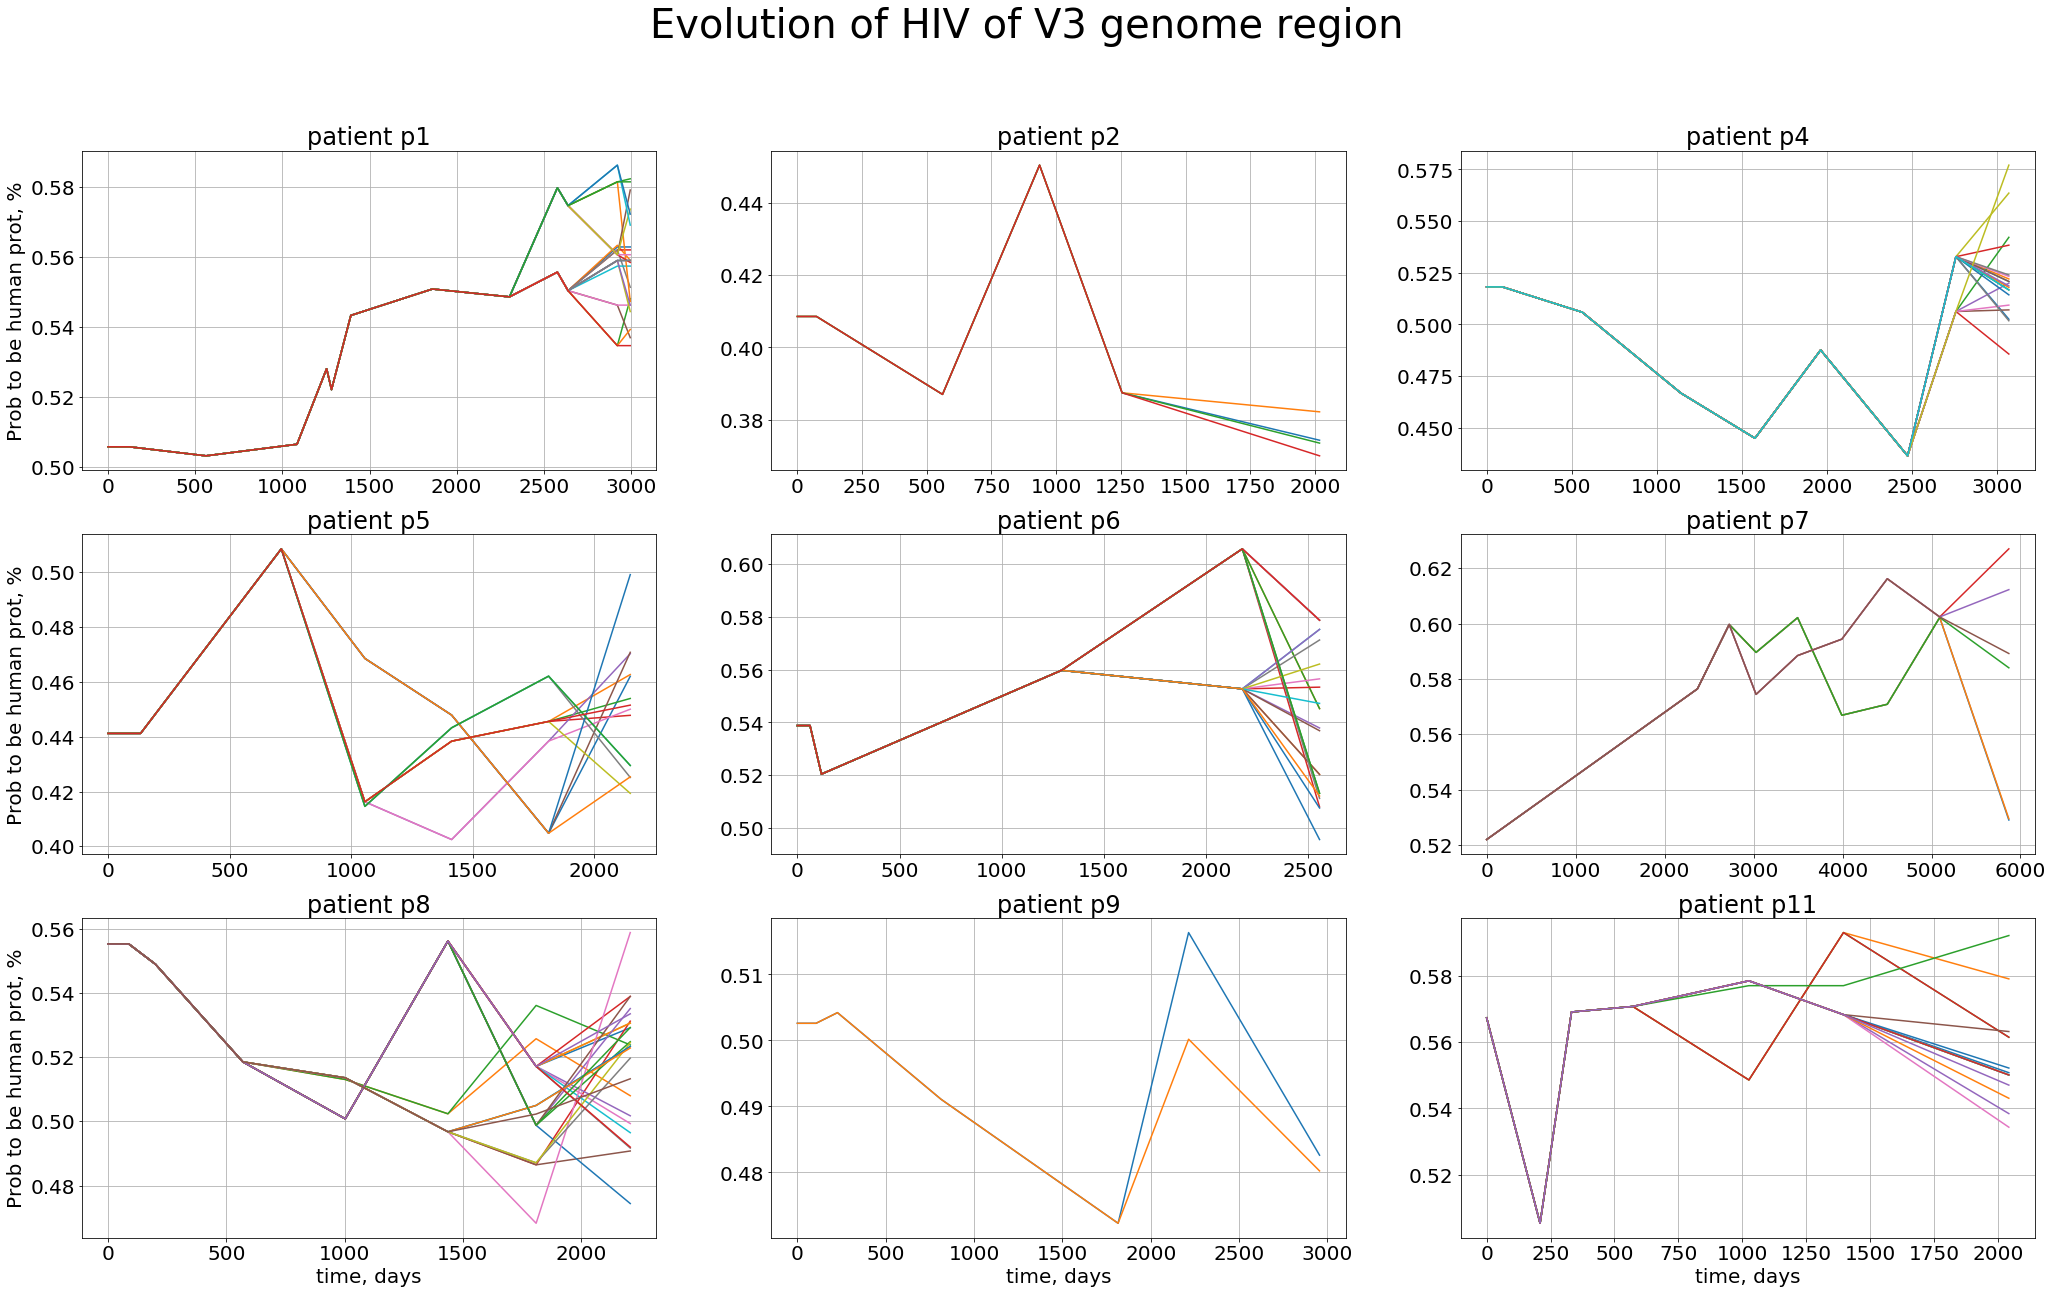

In [17]:
analyser.plot_paths()